In [33]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn import metrics
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [19]:
results = pd.read_csv('../../Data/ResultData/ADAUSDT_7_5_wave_trend_results.csv')
df = results[results['clean_gains'] != 0]
df = df.drop(columns = ['symbol', 'indicator', 'start_date', 'end_date', 'mean', 'n_total_partitions', 'n_partitions'])

In [20]:
df.head()

,ob_level,os_level,k,std,skewness,kurtosis,entropy,clean_gains
0,43,-63,0.001,0.002346,0.055612,-0.985233,9.217999,0.157059
1,43,-63,0.001,0.002326,0.409831,-0.210873,9.218010,4.233419
2,43,-63,0.002,0.005681,0.283234,-1.222078,9.216114,1.832861
3,43,-63,0.001,0.005335,-0.429036,-1.028970,9.216932,-13.175106
4,43,-63,0.002,0.002326,0.409831,-0.210873,9.218010,3.616770


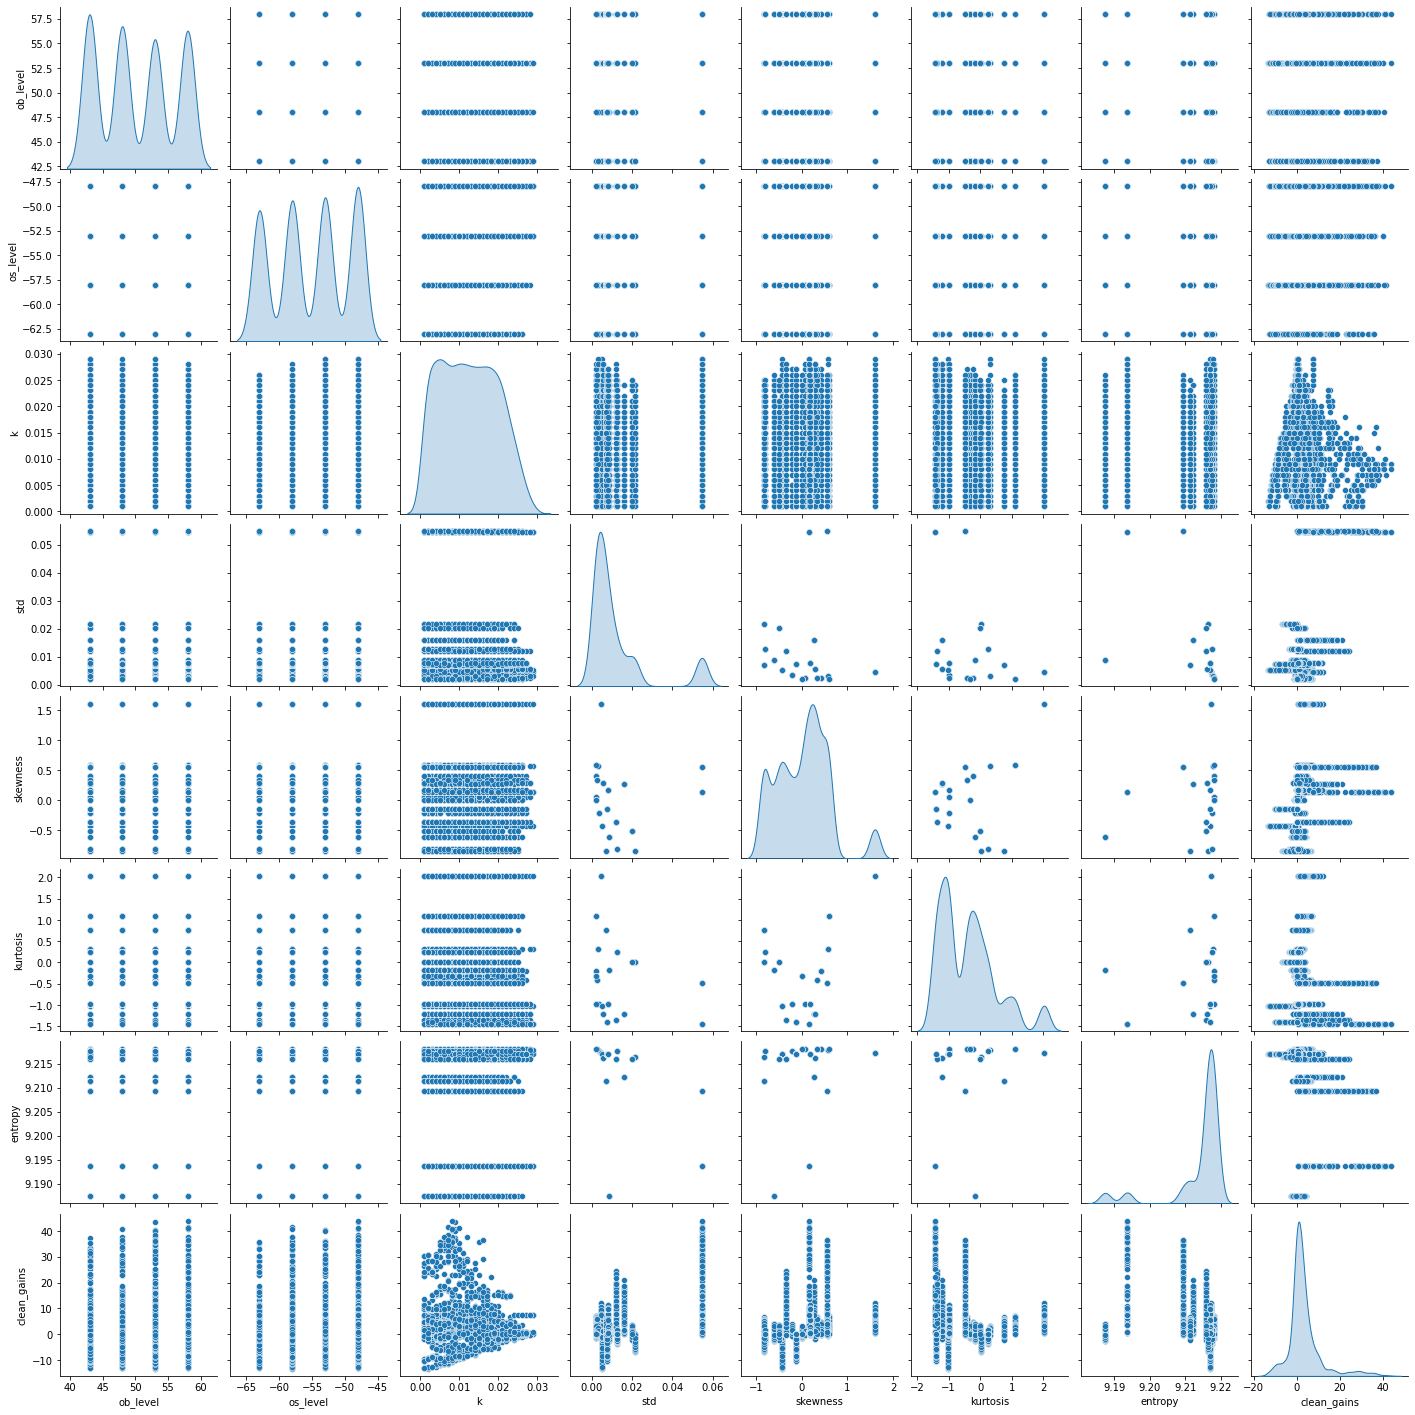

In [21]:
sns.pairplot(df[['ob_level', 'os_level', 'k', 'std', 'skewness', 'kurtosis', 'entropy', 'clean_gains']], diag_kind='kde')

In [22]:
X = df[['ob_level', 'os_level', 'k', 'std', 'skewness', 'kurtosis', 'entropy']].to_numpy()
y = df['clean_gains'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [59]:
model_scores = []  # List of tuples

# MLP Regressor

In [39]:
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
             'solver': ['lbfgs', 'sgd', 'adam'],
             'learning_rate': ['constant', 'invscaling', 'adaptive']}

model = MLPRegressor(random_state=1, max_iter=1000)

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

mlp = clf.best_estimator_

mlp_y_pred = mlp.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_base.py:170: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
E:\Anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
E:\Anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estim

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*arg

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*arg

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*arg

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

In [60]:
mlp_r2 = metrics.r2_score(y_test, mlp_y_pred)
model_scores.append((mlp, mlp_r2))
print(mlp_r2)

0.6572820712829646


# Gradient Boosting Regressor

In [44]:
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile'],
             'criterion': ['friedman_mse', 'mse', 'mae'],
             'max_features': ['auto', 'sqrt', 'log2']}

model = GradientBoostingRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

gbr = clf.best_estimator_

gbr_y_pred = gbr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated 

E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated 

E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  " loss='lad' instead.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1633: FutureWarning: criterion='mae' was deprecated 

In [46]:
gbr_r2 = metrics.r2_score(y_test, gbr_y_pred)
model_scores.append((gbr, gbr_r2))
print(gbr_r2)

0.9392858355584615


# Gaussian Process Regressor

In [55]:
param_grid = {'normalize_y': [True, False]}

model = GaussianProcessRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

gpr = clf.best_estimator_

gpr_y_pred = gpr.predict(X_test)

In [61]:
gpr_r2 = metrics.r2_score(y_test, gpr_y_pred)
model_scores.append((gpr, gpr_r2))
print(gpr_r2)

0.6947089972490053


# Decission Tree Regressor

In [47]:
param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'],
             'splitter': ['best', 'random'],
             'max_features': ['auto', 'sqrt', 'log2']}

model = DecisionTreeRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

dt = clf.best_estimator_

dt_y_pred = dt.predict(X_test)

In [63]:
dt_r2 = metrics.r2_score(y_test, dt_y_pred)
model_scores.append((dt, dt_r2))
print(dt_r2)

0.9480813180927985


# Random Forests

In [53]:
param_grid = {'n_estimators': [75, 100, 125, 150], 
             'criterion': ['mse', 'mae']}

model = RandomForestRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

rf = clf.best_estimator_

rf_y_pred = rf.predict(X_test)

In [64]:
rf_r2 = metrics.r2_score(y_test, rf_y_pred)
model_scores.append((rf, rf_r2))
print(rf_r2)

0.9682444180288273


# K Neighbors Regressor

In [56]:
param_grid = {'n_neighbors': range(2, 30)}

model = KNeighborsRegressor()

clf = GridSearchCV(model, param_grid)

clf.fit(X_train, y_train)

knr = clf.best_estimator_

knr_y_pred = knn.predict(X_test)

print(clf.best_params_)

{'n_neighbors': 2}


In [65]:
knr_r2 = metrics.r2_score(y_test, knr_y_pred)
model_scores.append((knr, knr_r2))
print(knr_r2)

0.7959207024731266


# Model Selection

In [66]:
max_r2 = 0
best_model = None
for t in model_scores:
    if max_r2 < t[1]:
        max_r2 = t[1]
        best_model = t[0]

In [67]:
print(best_model)

RandomForestRegressor(criterion='mae')


In [68]:
print(max_r2)

0.9682444180288273


# Predicting optimal parameters

In [69]:
# Mock parameters
std = 0.003
skewness = 0.041
kurtosis = -0.9
entropy = 9.123

In [70]:
best_pred = 0
best_params = {'ob_level': None,
              'os_level': None,
              'k': None}

for ob_level in range(43, 63, 5):
    for os_level in range(-63, -43, 5):
        for k in np.arange(0.001, 0.030, 0.001):
            x = [[std, skewness, kurtosis, entropy, ob_level, os_level, k]]
            pred = et.predict(x)
            if pred > best_pred:
                best_pred = pred
                best_params['ob_level'] = ob_level
                best_params['os_level'] = os_level
                best_params['k'] = k

In [71]:
best_pred

array([28.52102193])

In [72]:
best_params

{'ob_level': 43, 'os_level': -63, 'k': 0.001}